In [71]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
os.chdir('C:\\Users\\HP\\OneDrive\\Desktop\\flask\\Spam_Detection_tool\\ML_Model\\')
df=pd.read_csv('email.csv')

In [72]:
df.head(150)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
145,ham,Yes see ya not on the dot
146,ham,Whats the staff name who is taking class for us?
147,spam,FreeMsg Why haven't you replied to my text? I'...
148,ham,Ummma.will call after check in.our life will b...


In [73]:
df.sample()

,Category,Message
3751,ham,"Buzz! Hey, my Love ! I think of you and hope y..."


In [74]:
df.shape

(5575, 2)

In [75]:
df.rename(columns={'Category':'target','Message':'text'},inplace=True)

In [76]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name
5572,spam,Your Rs.7933000 MSME loan.... has been process...
5573,spam,yu have won cash prize claim it


In [77]:
#label encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [78]:
df['target']=encoder.fit_transform(df['target'])

In [79]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name
5572,1,Your Rs.7933000 MSME loan.... has been process...
5573,2,yu have won cash prize claim it


In [80]:
#0---->ham
#1--->spam


In [81]:
df['target'].isnull().sum()

0

In [82]:
df.duplicated().sum()

415

In [83]:
df=df.drop_duplicates(keep='first')

In [84]:
df.shape

(5160, 2)

In [85]:
df['target'].value_counts()

0    4516
1     642
2       2
Name: target, dtype: int64

ValueError: 'label' must be of length 'x'

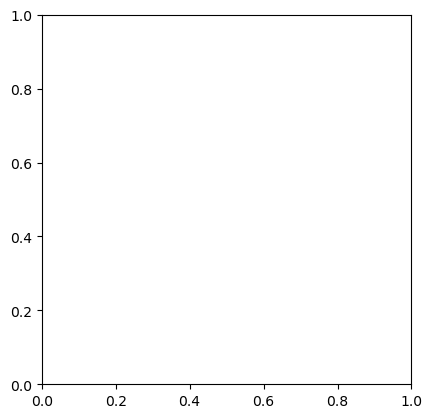

In [138]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [139]:
#ham is very high whereas spam is imbalanced


In [140]:
import nltk

In [141]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [142]:
df['num_charecters']=df['text'].apply(len)

C:\Users\HP\AppData\Local\Temp\ipykernel_36580\1780518261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_charecters']=df['text'].apply(len)


In [143]:
df.head()

,target,text,num_charecters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [144]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\HP\AppData\Local\Temp\ipykernel_36580\1118471538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [145]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\HP\AppData\Local\Temp\ipykernel_36580\754723001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [146]:
df.head()

,target,text,num_charecters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [147]:
df[['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,5160.000000,5160.000000,5160.000000
mean,79.095543,18.555814,1.969186
std,58.372287,13.403572,1.455291
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [148]:
df[df['target']==0][['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869796,17.267715,1.827724
std,56.710489,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [149]:
df[df['target']==1][['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,642.000000,642.000000,642.000000
mean,137.054517,27.644860,2.967290
std,30.419303,7.121525,1.486451
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,156.750000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='num_charecters', ylabel='Count'>

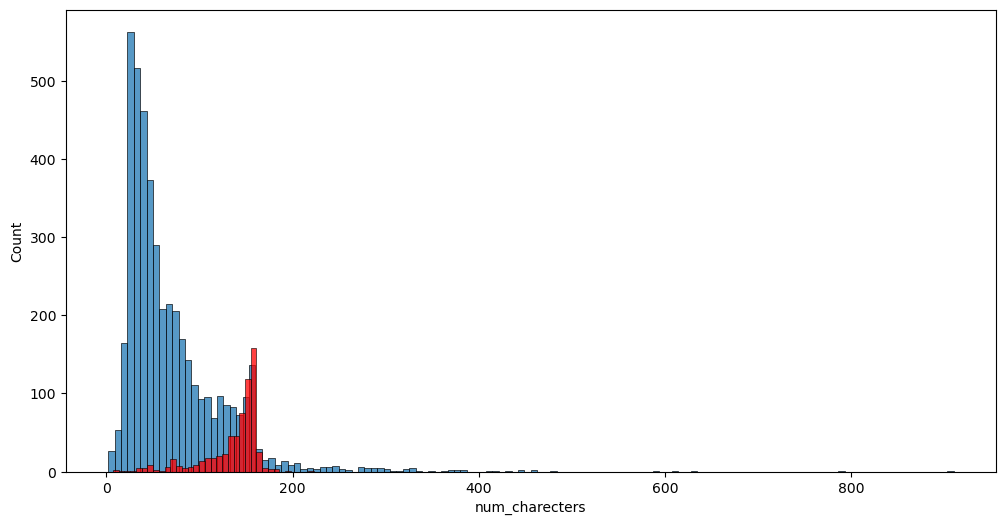

In [150]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_charecters'])
sns.histplot(df[df['target']==1]['num_charecters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

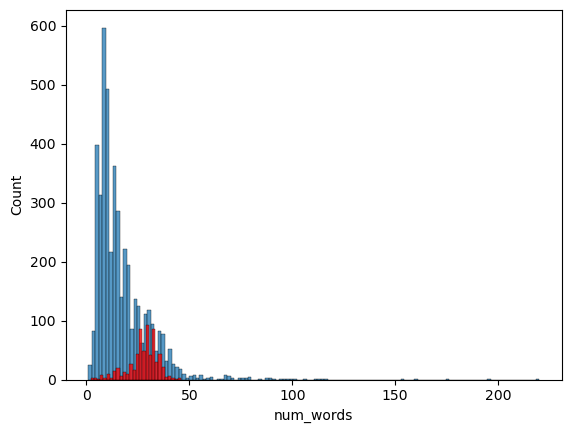

In [151]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

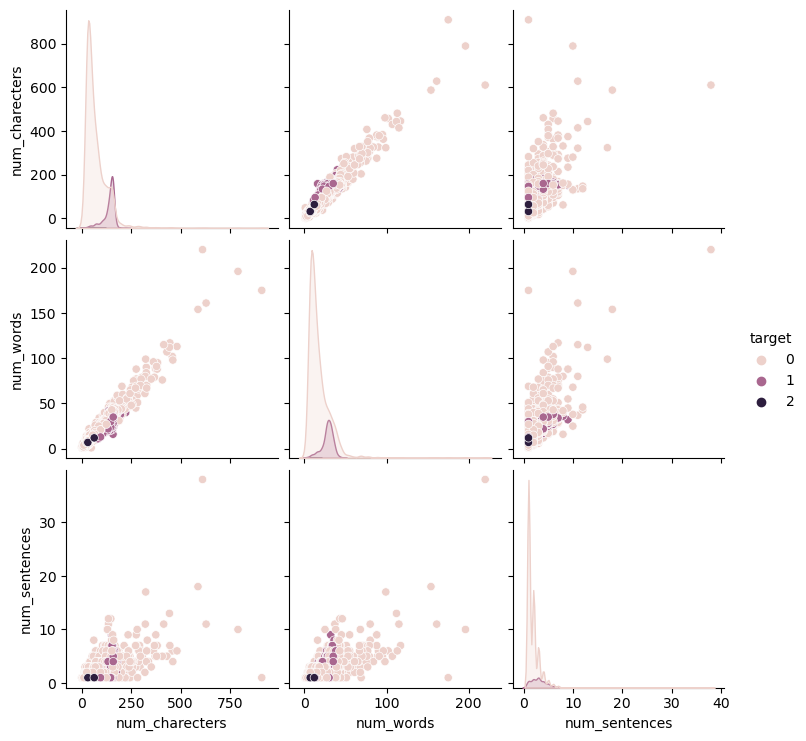

In [152]:
sns.pairplot(df,hue='target')

In [153]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]      
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
           y.append(i) 

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [154]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [155]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [156]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('love')

'love'

In [157]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [158]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [159]:
df['transformed_text']=df['text'].apply(transform_text)

C:\Users\HP\AppData\Local\Temp\ipykernel_36580\4139466366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [160]:
df

,target,text,num_charecters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...
5571,0,Rofl. Its true to its name,26,7,2,rofl true name
5572,1,Your Rs.7933000 MSME loan.... has been process...,96,13,1,msme loan process gstapplynow
5573,2,yu have won cash prize claim it,32,7,1,yu cash prize claim


In [161]:
df.head()

,target,text,num_charecters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [162]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [163]:
len(spam_corpus)

9785

In [164]:
from collections import Counter
import seaborn as sns
x=pd.DataFrame(Counter(spam_corpus).most_common(30))[[0]]
y=pd.DataFrame(Counter(spam_corpus).most_common(30))[[1]]


In [165]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [166]:
x.shape

(5160, 3000)

In [167]:
y=df['target'].values

In [168]:
y

array([0, 0, 1, ..., 1, 2, 2])

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [171]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [172]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [173]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)

In [174]:
y_pred1

array([0, 1, 0, ..., 0, 0, 0])

In [175]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8594961240310077
[[786 118   8]
 [ 19 101   0]
 [  0   0   0]]


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9757751937984496
[[912   0]
 [ 25  95]]
1.0


In [ ]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835271317829457
[[912   0]
 [ 17 103]]
1.0


In [ ]:
#tfidf--->mnb

In [ ]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
user_input = input("enter the text")

print(user_input)

cleaned_text = transform_text(user_input)
    
vector_input = tfidf.transform([cleaned_text])
result = mnb.predict(vector_input)[0]
    
if result == 1:
        print("Spam")
    
else:
        print("Unspam")


this is spam message dont click on it
Unspam
